# Preliminary exploratory data analysis of top 100 tennis ranked tennis players
This Jupyter notebook will demostrate that the dataset can be read into R and present the data in a tidy format.

## Introduction
It is without a doubt that tennis is a very popular sport all around the world. There are several huge tournaments that occur yearly such as Wimbledon, US Open, and Australian Open. In the data set that we are working with today, it shows the statistics of the top 500 tennis players around the world. We want to analyze and tidy this data set from the original set so there’s a clear and concise set of data to use for our project. In our data set we need to tidy the set by highest rank, so number one comes out first and then second and so on. With the data columns chosen, what is the relationship between players and their rankings, prize money, and how they chose to play? We want to see what percentage of players who are right handed versus the players who are left handed and where they fall on their rankings. Visualizing the data will show the results in a clear and concise way. While reading the data it was found that one player had a huge difference in prize money compared to the general group, the number one ranked player Rafeal Nadal. It was decided it would be best to remove the player since the graph that was visualized with Rafeal was not the best because it made the graph inaccurate. 

## Setup

In [10]:
library(tidyverse)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)
library(digest)
library(tidymodels)
library(GGally)
library(ISLR)

## Data Reading

In [11]:
raw_data <- read_csv("player_stats.csv")
raw_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Data Wrangling
Firstly, because we want to predict the prize money of players, so we delete all irrelevant columns like Country, Name, Favorite Surface.
Plus, we delete Rafael Madal(whose current rank is 1) beacuse his prize money is tremendously larger than other players(10 times larger than the player just behind him).
Secondly, we use mutate function to remove useless characters and signals in Height, Current Rank, Price Money coloums.
Thirdly, we use arrange function to rank the players in the dataset acording to their current rank.\
Finally, we spilt the data into training data and testing data.

In [12]:
set.seed(2000)
tidy_data <- raw_data %>%
             select(Age:Seasons) %>%
             select(-Wikipedia, -'Best Rank', -Country, -Name, -'Favorite Surface') %>%
             mutate(Age = as.integer(str_sub(Age, 1, 2))) %>%
             mutate('Height(cm)' = as.integer(str_sub(Height, 1, 3))) %>%
             select(-Height) %>%
             mutate(`Current Rank` = as.integer(str_remove(string = raw_data$`Current Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Prize Money` = as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))) %>%
             mutate(Plays = as.factor(Plays)) %>%
             mutate(Backhand = as.factor(Backhand)) %>%
             filter(`Prize Money` != "NA", Seasons != "NA") %>%
             arrange(`Current Rank`) %>%
             filter(`Current Rank` != 1)
tidy_data
data_split <- initial_split(tidy_data, prop = 0.6, strata = `Prize Money`)
data_training <- training(data_split)
data_testing <- testing(data_split)

Warning message:
“Problem with `mutate()` input `Prize Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize Money` is `as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


Age,Plays,Current Rank,Backhand,Prize Money,Turned Pro,Seasons,Height(cm)
<int>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>
23,Right-handed,4,Two-handed,10507693,2014,5,NA
21,Right-handed,6,One-handed,10425605,2016,4,NA
23,Right-handed,8,Two-handed,3580862,2015,3,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
20,Right-handed,492,Two-handed,14811,NA,1,NA
23,Right-handed,494,Two-handed,33471,NA,3,NA
20,Right-handed,499,Two-handed,82547,NA,1,NA


## Pick Predictors
Here, we create 5 plots for each potential predictors to demonstrate their relationships with prize money.

Warning message:
“Removed 157 rows containing missing values (geom_point).”
Warning message:
“Removed 81 rows containing missing values (geom_point).”


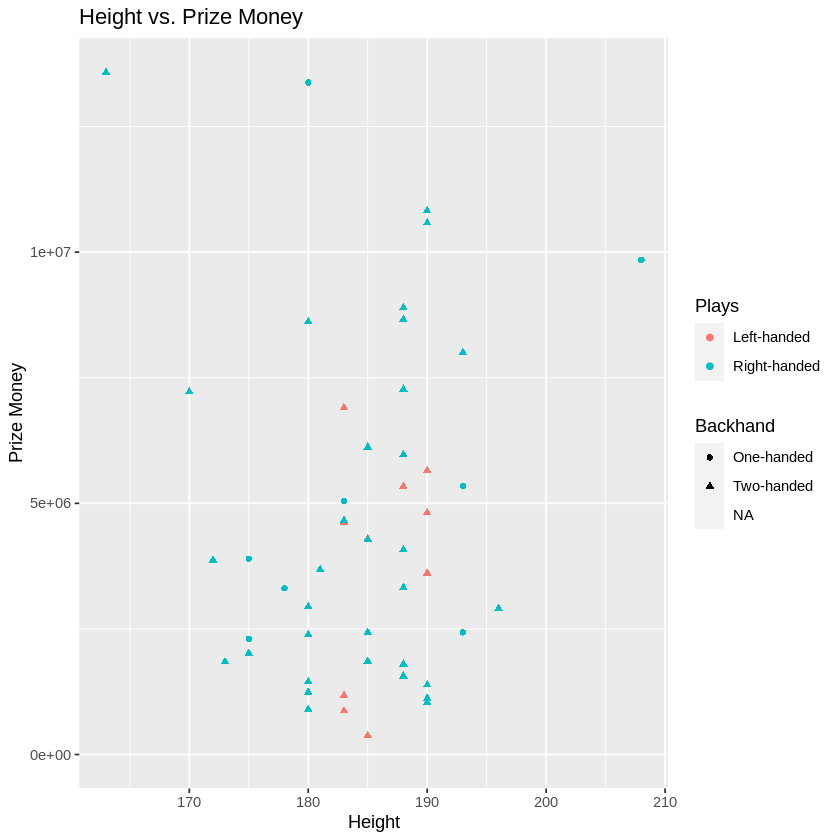

Warning message:
“Removed 4 rows containing missing values (geom_point).”


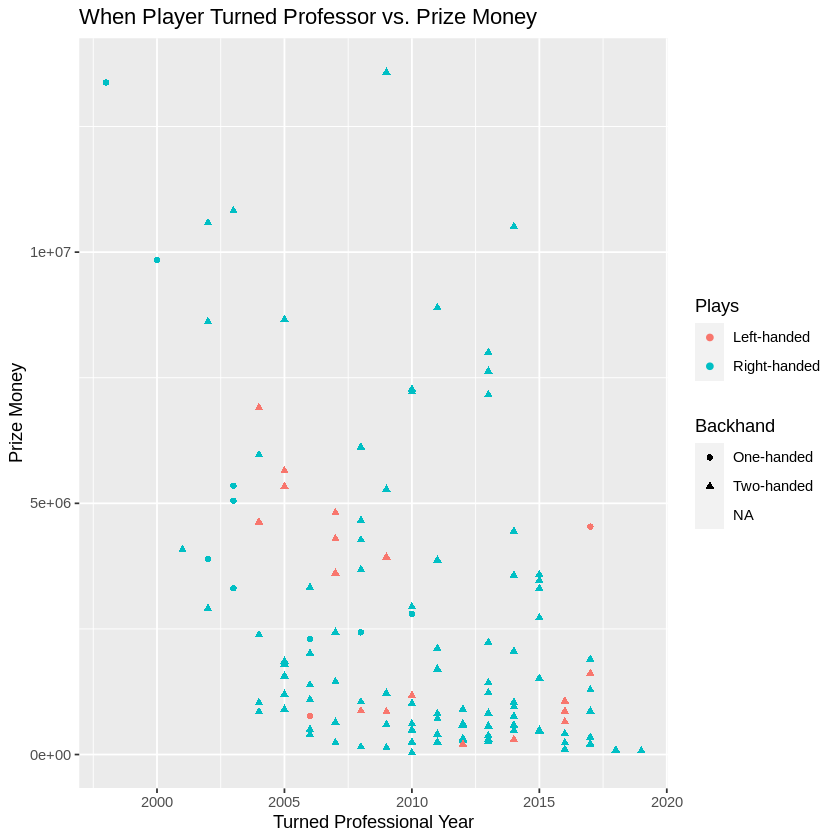

Warning message:
“Removed 4 rows containing missing values (geom_point).”


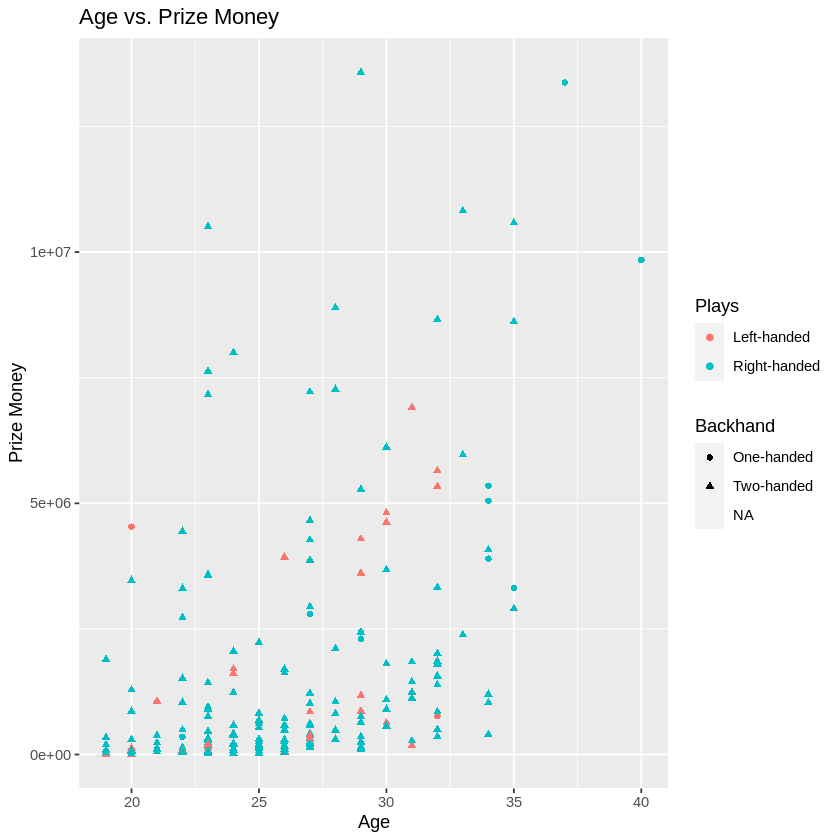

Warning message:
“Removed 4 rows containing missing values (geom_point).”


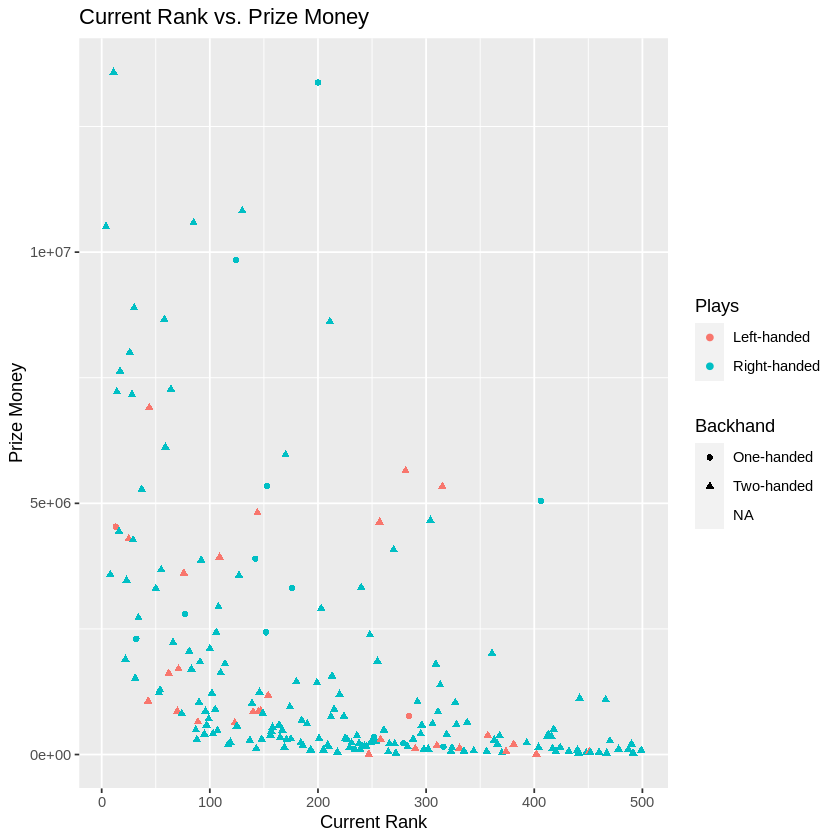

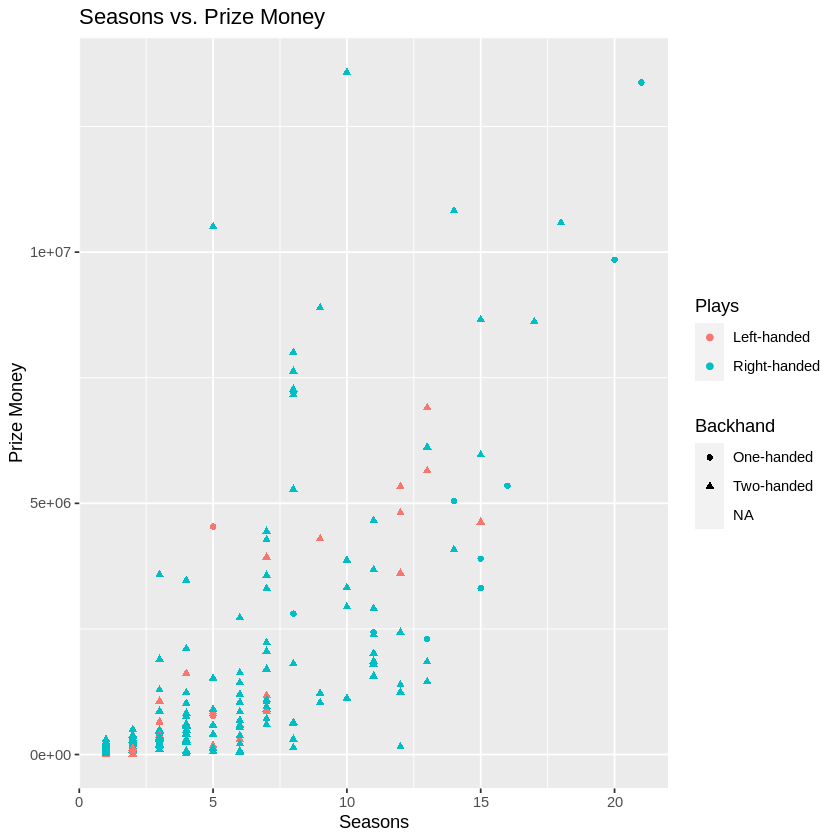

In [13]:
height_momeny_plot <- data_training %>%
    ggplot(aes(x = `Height(cm)`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Height", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Height vs. Prize Money")
height_momeny_plot
turnPro_momeny_plot <- data_training %>%
    ggplot(aes(x = `Turned Pro`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Turned Professional Year", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("When Player Turned Professor vs. Prize Money")
turnPro_momeny_plot
age_momeny_plot <- data_training %>%
    ggplot(aes(x = Age, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Age", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Age vs. Prize Money")
age_momeny_plot
rank_momeny_plot <- data_training %>%
    ggplot(aes(x = `Current Rank`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Current Rank", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Current Rank vs. Prize Money")
rank_momeny_plot
season_momeny_plot <- data_training %>%
    ggplot(aes(x = `Seasons`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Seasons", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Seasons vs. Prize Money")
season_momeny_plot

Seen from plots above, we find that height and when player turned professional barely have any relationships with prize money. While, age have a weak positive linear relationship with prize money; current rank have a weak negative linear relationship with prize money; seasons have a strong positive linear relationship with prize money.
As a result, we decide to choose age, current rank and seasons as predictors. Furthermore, we decide to use linear regression as model because they the As a result we choose all have linear relationships with prize money and linear regression is better at predicting linear relationships.

## Predict the price money using Linear regression:

In [14]:

lm_spec <- linear_reg() %>% 
      set_engine("lm") %>%
      set_mode("regression")
data_recipe <-  recipe(`Prize Money` ~ Age + `Current Rank` + `Seasons`, data = data_training)
data_fit <- workflow() %>%
      add_recipe(data_recipe) %>%
      add_model(lm_spec) %>%
      fit(data = data_training)
data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
   (Intercept)             Age  `Current Rank`         Seasons  
       1293830          -29740           -4948          399945  


So the mathematical equations for the linear regression prediction model is:
$Price\: Money = 1250589 - 21876*Age  - 5665*Current\: Rank + 409933*Seasons$

## Compute RMSE and RMSPE of Linear regression

In [15]:
lm_rmse <- data_fit %>%
        predict(data_training) %>%
        bind_cols(data_training) %>%
        metrics(truth = `Prize Money`, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmse

[1] 1708237

In [16]:
lm_rmspe <- data_fit %>%
        predict(data_testing) %>%
        bind_cols(data_testing) %>%
        metrics(truth = `Prize Money`, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmspe

[1] 1851991

RMSE of linear regression is 1708237, RMSPE is 1851990, which is a little larger than RMSE. So the predict model is vaild.

## Predict the prize money using Knn regression and compute its RMSPE:

Choose the best number of neighbors for the knn regression:

In [17]:
set.seed(2000)
data_recipe_scaled <-  recipe(`Prize Money` ~ Age + `Current Rank` + `Seasons`, data = data_training) %>%
                  step_scale(all_predictors()) %>%
                  step_center(all_predictors())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
data_fold <- vfold_cv(data_training, v = 5, strata = `Prize Money`)
gridvals <- tibble(neighbors = seq(1,50))
data_workflow <- workflow() %>%
                 add_recipe(data_recipe_scaled) %>%
                 add_model(knn_spec)
result <- data_workflow %>%
                       tune_grid(resamples = data_fold, grid = gridvals) %>%
                       collect_metrics() %>%
                       filter(.metric == 'rmse') %>%
                       filter(mean == min(mean)) %>%
                       select(n) %>%
                       pull()
result

[1] 5

Use the result k = 5 for the model and compute the RMSPE:

In [18]:
set.seed(2000)
data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = result) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
data_fit <- workflow() %>%
           add_recipe(data_recipe_scaled) %>%
           add_model(data_spec) %>%
           fit(data = data_training)
data_summary <- data_fit %>% 
           predict(data_testing) %>%
           bind_cols(data_testing) %>%
           metrics(truth = `Prize Money`, estimate = .pred) 
knn_rmspe <- data_summary %>%
            filter(.metric == 'rmse') %>%
            select(.estimate) %>%
            pull()
knn_rmspe

[1] 1735815

The RMSPE of knn-regression is 1735815, which is surprisingly smaller than the RMSPE of linear regression. So we decide to use knn-regression model.

## Visualize the prediction

In [1]:

data_preds <- data_fit %>%
       predict(data_training) %>%
       bind_cols(data_training)
age_momeny_regression_plot <- age_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = Age, y = .pred), color = "blue")
age_momeny_regression_plot
rank_momeny_regression_plot <- rank_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = `Current Rank`, y = .pred), color = "blue")
rank_momeny_regression_plot
season_momeny_regression_plot <- season_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = `Seasons`, y = .pred), color = "blue")
season_momeny_regression_plot

ERROR: Error in data_fit %>% predict(data_training) %>% bind_cols(data_training): could not find function "%>%"


# References

Citations:

Ioc. (2021, July 14). A brief history of tennis. Retrieved April 7, 2022, from https://olympics.com/ioc/news/a-brief-history-of-tennis

